In [ ]:
!pip install transformers sentencepiece datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# load the pretrained model

In [ ]:
from datasets import load_dataset
from IPython.display import display
from IPython.html import widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from torch import optim
from torch.nn import functional as F
from transformers import AdamW, AutoModelForSeq2SeqLM, AutoTokenizer
from transformers import get_linear_schedule_with_warmup
from tqdm import tqdm_notebook

sns.set()

/usr/local/lib/python3.10/dist-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [ ]:
# Use 'google/mt5-small'
model_repo = 'google/mt5-small'
max_seq_len = 20



In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_repo)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Model description: https://huggingface.co/google/mt5-small
model = AutoModelForSeq2SeqLM.from_pretrained('google/mt5-small')


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Test the tokenizer

In [ ]:
input_str='<Ja> testing the nlp task'# this english text line we want to translate it to japanese language for example <Ja>
input_ids=tokenizer.encode(input_str)
print(input_ids)
tokens=tokenizer.convert_ids_to_tokens(input_ids)
print("tokens are ",tokens )

[1042, 9643, 669, 259, 46542, 287, 259, 272, 280, 325, 41401, 1]
tokens are  ['▁<', 'Ja', '>', '▁', 'testing', '▁the', '▁', 'n', 'l', 'p', '▁task', '</s>']


In [ ]:
tokenizer.vocab

{'構造': 70377,
 '集': 8773,
 '截止': 200691,
 'RAJA': 131382,
 'ജ്ഞാന': 223902,
 'leek': 79579,
 'ЛГА': 155957,
 'aburanba': 62530,
 'ych': 3039,
 'TEH': 179755,
 'ស្ប': 221365,
 '▁воздухо': 221626,
 '▁kät': 114068,
 'ክል': 23166,
 '▁имун': 111772,
 'إد': 78920,
 'answer': 57996,
 '265': 29774,
 'cator': 172236,
 'ໄຂ': 133066,
 'ல்வி': 161597,
 'ᱻ': 242358,
 'lieh': 206466,
 '気になります': 219061,
 'گزارش': 11602,
 '鉤': 243345,
 'য়া': 14606,
 '▁düz': 65964,
 '▁k': 408,
 'വിളി': 222528,
 'üzer': 43533,
 '朗': 57495,
 '799.': 154642,
 'ுக்கும்': 104238,
 'bebe': 139522,
 'უმე': 142846,
 'ையில்': 29445,
 '▁dessert': 85250,
 '的价格': 204182,
 'таш': 33017,
 'సిక': 214261,
 'komenc': 72831,
 '▁<extra_id_36>': 250063,
 'βι': 75187,
 'कर': 3689,
 'Magnetic': 111894,
 '子どもが': 232924,
 'potheek': 207986,
 '▁THE': 7869,
 '▁gez': 53479,
 '▁२': 11846,
 'almac': 119862,
 '프로그램': 182467,
 'beauty': 67938,
 'bores': 176981,
 'մաստ': 153059,
 'Hairstyles': 196226,
 '▁Pedro': 19167,
 '▁סאַ': 122671,
 'tettek': 187

# ***Load*** the Dataset

In [ ]:
# Source: https://huggingface.co/datasets/alt
dataset=load_dataset('alt') # it supports 13 languages

Generating train split:   0%|          | 0/18088 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1019 [00:00<?, ? examples/s]

In [ ]:
train_dataset=dataset['train']
test_dataset=dataset['test']

In [ ]:
train_dataset  #num of rows =18088

Dataset({
    features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
    num_rows: 18088
})

In [ ]:
test_dataset  #num of rows =1019

Dataset({
    features: ['SNT.URLID', 'SNT.URLID.SNTID', 'url', 'translation'],
    num_rows: 1019
})

In [ ]:
# let's see the first example in the training dataset
train_dataset[0]

{'SNT.URLID': '80188',
 'SNT.URLID.SNTID': '1',
 'url': 'http://en.wikinews.org/wiki/2007_Rugby_World_Cup:_Italy_31_-_5_Portugal',
 'translation': {'bg': 'ফ্রান্সের প্যারিসের পার্ক দি প্রিন্সেস-এ হওয়া ২০০৭-এর রাগবি বিশ্বকাপের পুল সি-তে ইটালি পর্তুগালকে ৩১-৫ গোলে হারিয়েছে।',
  'en': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes, Paris, France.',
  'en_tok': 'Italy have defeated Portugal 31-5 in Pool C of the 2007 Rugby World Cup at Parc des Princes , Paris , France .',
  'fil': 'Natalo ng Italya ang Portugal sa puntos na 31-5 sa Grupong C noong 2007 sa Pandaigdigang laro ng Ragbi sa Parc des Princes, Paris, France.',
  'hi': '2007 में फ़्रांस, पेरिस के पार्क डेस प्रिंसेस में हुए रग्बी विश्व कप के पूल C में इटली ने पुर्तगाल को 31-5 से हराया।',
  'id': 'Italia berhasil mengalahkan Portugal 31-5 di grup C dalam Piala Dunia Rugby 2007 di Parc des Princes, Paris, Perancis.',
  'ja': 'フランスのパリ、パルク・デ・プランスで行われた2007年ラグビーワールドカップのプールCで、イタリアは31対5でポルトガルを

In [ ]:
tokenizer.vocab['en']

278

In [ ]:
# now we want to map the this expression 'en' to this <en> putting it in tags and then adding them in the tokenizer as you see the <en>,<ja>.. is not exist in it
LANG_TOKEN_MAPPING = {
    'en': '<en>',
    'ja': '<jp>',
    'zh': '<zh>'
}

In [ ]:
special_tokens_dict = {'additional_special_tokens': list(LANG_TOKEN_MAPPING.values())}
tokenizer.add_special_tokens(special_tokens_dict)
model.resize_token_embeddings(len(tokenizer))




Embedding(250103, 512)

In [ ]:
def encode_input_str(text, target_lang, tokenizer, seq_len,
                     lang_token_map=LANG_TOKEN_MAPPING):
  target_lang_token = lang_token_map[target_lang]
  # Tokenize and add special tokens
  input_ids = tokenizer.encode(
      text = target_lang_token + text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return input_ids[0]




def encode_target_str(text, tokenizer, seq_len,
                      lang_token_map=LANG_TOKEN_MAPPING):
  token_ids = tokenizer.encode(
      text = text,
      return_tensors = 'pt',
      padding = 'max_length',
      truncation = True,
      max_length = seq_len)

  return token_ids[0]



def format_translation_data(translations, lang_token_map,
                            tokenizer, seq_len=128):
  # Choose a random 2 languages for in i/o
  langs = list(lang_token_map.keys())
  input_lang, target_lang = np.random.choice(langs, size=2, replace=False)

  # Get the translations for the batch
  input_text = translations[input_lang]
  target_text = translations[target_lang]

  if input_text is None or target_text is None:
    return None

  input_token_ids = encode_input_str(
      input_text, target_lang, tokenizer, seq_len, lang_token_map)

  target_token_ids = encode_target_str(
      target_text, tokenizer, seq_len, lang_token_map)

  return input_token_ids, target_token_ids

def transform_batch(batch, lang_token_map, tokenizer):
  inputs = []
  targets = []
  for translation_set in batch['translation']:
    formatted_data = format_translation_data(
        translation_set, lang_token_map, tokenizer, max_seq_len)

    if formatted_data is None:
      continue

    input_ids, target_ids = formatted_data
    inputs.append(input_ids.unsqueeze(0))
    targets.append(target_ids.unsqueeze(0))

  batch_input_ids = torch.cat(inputs).cuda()
  batch_target_ids = torch.cat(targets).cuda()

  return batch_input_ids, batch_target_ids

def get_data_generator(dataset, lang_token_map, tokenizer, batch_size=32):
  dataset = dataset.shuffle()
  for i in range(0, len(dataset), batch_size):
    raw_batch = dataset[i:i+batch_size]
    yield transform_batch(raw_batch, lang_token_map, tokenizer)

In [ ]:
# Testing `data_transform`
in_ids, out_ids = format_translation_data(
    train_dataset[0]['translation'], LANG_TOKEN_MAPPING, tokenizer)

print(' '.join(tokenizer.convert_ids_to_tokens(in_ids)))
print(' '.join(tokenizer.convert_ids_to_tokens(out_ids)))

# Testing data generator
data_gen = get_data_generator(train_dataset, LANG_TOKEN_MAPPING, tokenizer, 8)
data_batch = next(data_gen)
print('Input shape:', data_batch[0].shape)
print('Output shape:', data_batch[1].shape)

<zh> ▁Italy ▁have ▁de feat ed ▁Portugal ▁3 1-5 ▁in ▁Pool ▁C ▁of ▁the ▁2007 ▁ Rugby ▁World ▁Cup ▁at ▁Parc ▁des ▁Princes , ▁Paris , ▁France . </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>
▁ 意大利 在 法国 巴黎 王子 公园 体育 场 举办 的 2007 年 橄 榄 球 世界杯 C 组 以 3 1-5 击 败 葡萄 牙 。 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

# Train/Finetune BERT

In [ ]:
n_epochs = 8
batch_size = 16
print_freq = 50
lr = 5e-4
n_batches = int(np.ceil(len(train_dataset) / batch_size))
total_steps = n_epochs * n_batches
n_warmup_steps = int(total_steps * 0.01)

In [ ]:
optimizer = AdamW(model.parameters(), lr=lr)
scheduler = get_linear_schedule_with_warmup(
    optimizer, n_warmup_steps, total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
losses = []

In [ ]:

def eval_model(model, gdataset, max_iters=8):
  test_generator = get_data_generator(gdataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)
  eval_losses = []
  for i, (input_batch, label_batch) in enumerate(test_generator):
    if i >= max_iters:
      break

    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)
    eval_losses.append(model_out.loss.item())

  return np.mean(eval_losses)



In [ ]:
model.to("cuda:0")
input_batch = input_batch.to("cuda:0")
label_batch = label_batch.to("cuda:0")


NameError: name 'input_batch' is not defined

In [ ]:
for epoch_idx in range(n_epochs):
  # Randomize data order
  data_generator = get_data_generator(train_dataset, LANG_TOKEN_MAPPING,
                                      tokenizer, batch_size)

  for batch_idx, (input_batch, label_batch) \
      in tqdm_notebook(enumerate(data_generator), total=n_batches):

    optimizer.zero_grad()

    # Forward pass
    model_out = model.forward(
        input_ids = input_batch,
        labels = label_batch)

    loss = model_out.loss
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Print training update info
    if (batch_idx + 1) % print_freq == 0:
      avg_loss = np.mean(losses[-print_freq:])
      print('Epoch: {} | Step: {} | Avg. loss: {:.3f} | lr: {}'.format(
          epoch_idx+1, batch_idx+1, avg_loss, scheduler.get_last_lr()[0]))

  test_loss = eval_model(model, test_dataset)
  print('Test loss of {:.3f}'.format(test_loss))

<ipython-input-24-06c164d87e41>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  in tqdm_notebook(enumerate(data_generator), total=n_batches):


  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 1 | Step: 50 | Avg. loss: 15.016 | lr: 0.00022123893805309737
Epoch: 1 | Step: 100 | Avg. loss: 7.102 | lr: 0.00044247787610619474
Epoch: 1 | Step: 150 | Avg. loss: 5.479 | lr: 0.0004983477717245691
Epoch: 1 | Step: 200 | Avg. loss: 4.581 | lr: 0.0004961150308118247
Epoch: 1 | Step: 250 | Avg. loss: 4.388 | lr: 0.0004938822898990802
Epoch: 1 | Step: 300 | Avg. loss: 4.102 | lr: 0.0004916495489863356
Epoch: 1 | Step: 350 | Avg. loss: 3.992 | lr: 0.0004894168080735911
Epoch: 1 | Step: 400 | Avg. loss: 3.847 | lr: 0.0004871840671608467
Epoch: 1 | Step: 450 | Avg. loss: 3.770 | lr: 0.00048495132624810217
Epoch: 1 | Step: 500 | Avg. loss: 3.687 | lr: 0.0004827185853353577
Epoch: 1 | Step: 550 | Avg. loss: 3.641 | lr: 0.0004804858444226132
Epoch: 1 | Step: 600 | Avg. loss: 3.552 | lr: 0.00047825310350986874
Epoch: 1 | Step: 650 | Avg. loss: 3.562 | lr: 0.0004760203625971242
Epoch: 1 | Step: 700 | Avg. loss: 3.458 | lr: 0.0004737876216843798
Epoch: 1 | Step: 750 | Avg. loss: 3.425 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 2 | Step: 50 | Avg. loss: 3.169 | lr: 0.0004523086541037778
Epoch: 2 | Step: 100 | Avg. loss: 3.173 | lr: 0.0004500759131910333
Epoch: 2 | Step: 150 | Avg. loss: 3.056 | lr: 0.00044784317227828887
Epoch: 2 | Step: 200 | Avg. loss: 3.111 | lr: 0.00044561043136554434
Epoch: 2 | Step: 250 | Avg. loss: 3.112 | lr: 0.00044337769045279987
Epoch: 2 | Step: 300 | Avg. loss: 3.118 | lr: 0.0004411449495400554
Epoch: 2 | Step: 350 | Avg. loss: 3.003 | lr: 0.0004389122086273109
Epoch: 2 | Step: 400 | Avg. loss: 3.118 | lr: 0.0004366794677145664
Epoch: 2 | Step: 450 | Avg. loss: 3.073 | lr: 0.0004344467268018219
Epoch: 2 | Step: 500 | Avg. loss: 3.092 | lr: 0.00043221398588907744
Epoch: 2 | Step: 550 | Avg. loss: 3.045 | lr: 0.00042998124497633296
Epoch: 2 | Step: 600 | Avg. loss: 3.017 | lr: 0.00042774850406358843
Epoch: 2 | Step: 650 | Avg. loss: 3.005 | lr: 0.000425515763150844
Epoch: 2 | Step: 700 | Avg. loss: 3.008 | lr: 0.0004232830222380995
Epoch: 2 | Step: 750 | Avg. loss: 2.983 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 3 | Step: 50 | Avg. loss: 2.865 | lr: 0.0004018040546574975
Epoch: 3 | Step: 100 | Avg. loss: 2.824 | lr: 0.0003995713137447531
Epoch: 3 | Step: 150 | Avg. loss: 2.802 | lr: 0.00039733857283200856
Epoch: 3 | Step: 200 | Avg. loss: 2.810 | lr: 0.0003951058319192641
Epoch: 3 | Step: 250 | Avg. loss: 2.808 | lr: 0.0003928730910065196
Epoch: 3 | Step: 300 | Avg. loss: 2.827 | lr: 0.00039064035009377514
Epoch: 3 | Step: 350 | Avg. loss: 2.818 | lr: 0.0003884076091810306
Epoch: 3 | Step: 400 | Avg. loss: 2.828 | lr: 0.0003861748682682862
Epoch: 3 | Step: 450 | Avg. loss: 2.865 | lr: 0.00038394212735554166
Epoch: 3 | Step: 500 | Avg. loss: 2.789 | lr: 0.0003817093864427972
Epoch: 3 | Step: 550 | Avg. loss: 2.861 | lr: 0.00037947664553005265
Epoch: 3 | Step: 600 | Avg. loss: 2.786 | lr: 0.00037724390461730823
Epoch: 3 | Step: 650 | Avg. loss: 2.835 | lr: 0.0003750111637045637
Epoch: 3 | Step: 700 | Avg. loss: 2.780 | lr: 0.00037277842279181923
Epoch: 3 | Step: 750 | Avg. loss: 2.775 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 4 | Step: 50 | Avg. loss: 2.633 | lr: 0.0003512994552112173
Epoch: 4 | Step: 100 | Avg. loss: 2.648 | lr: 0.00034906671429847284
Epoch: 4 | Step: 150 | Avg. loss: 2.622 | lr: 0.0003468339733857283
Epoch: 4 | Step: 200 | Avg. loss: 2.653 | lr: 0.0003446012324729839
Epoch: 4 | Step: 250 | Avg. loss: 2.624 | lr: 0.00034236849156023936
Epoch: 4 | Step: 300 | Avg. loss: 2.671 | lr: 0.0003401357506474949
Epoch: 4 | Step: 350 | Avg. loss: 2.650 | lr: 0.0003379030097347504
Epoch: 4 | Step: 400 | Avg. loss: 2.650 | lr: 0.00033567026882200593
Epoch: 4 | Step: 450 | Avg. loss: 2.649 | lr: 0.0003334375279092614
Epoch: 4 | Step: 500 | Avg. loss: 2.680 | lr: 0.00033120478699651693
Epoch: 4 | Step: 550 | Avg. loss: 2.684 | lr: 0.00032897204608377245
Epoch: 4 | Step: 600 | Avg. loss: 2.639 | lr: 0.000326739305171028
Epoch: 4 | Step: 650 | Avg. loss: 2.605 | lr: 0.00032450656425828345
Epoch: 4 | Step: 700 | Avg. loss: 2.616 | lr: 0.00032227382334553903
Epoch: 4 | Step: 750 | Avg. loss: 2.581 | l

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 5 | Step: 50 | Avg. loss: 2.544 | lr: 0.00030079485576493706
Epoch: 5 | Step: 100 | Avg. loss: 2.496 | lr: 0.0002985621148521925
Epoch: 5 | Step: 150 | Avg. loss: 2.408 | lr: 0.0002963293739394481
Epoch: 5 | Step: 200 | Avg. loss: 2.513 | lr: 0.0002940966330267036
Epoch: 5 | Step: 250 | Avg. loss: 2.534 | lr: 0.0002918638921139591
Epoch: 5 | Step: 300 | Avg. loss: 2.461 | lr: 0.0002896311512012146
Epoch: 5 | Step: 350 | Avg. loss: 2.442 | lr: 0.00028739841028847015
Epoch: 5 | Step: 400 | Avg. loss: 2.553 | lr: 0.0002851656693757256
Epoch: 5 | Step: 450 | Avg. loss: 2.523 | lr: 0.0002829329284629812
Epoch: 5 | Step: 500 | Avg. loss: 2.483 | lr: 0.00028070018755023667
Epoch: 5 | Step: 550 | Avg. loss: 2.436 | lr: 0.0002784674466374922
Epoch: 5 | Step: 600 | Avg. loss: 2.505 | lr: 0.00027623470572474767
Epoch: 5 | Step: 650 | Avg. loss: 2.494 | lr: 0.00027400196481200325
Epoch: 5 | Step: 700 | Avg. loss: 2.432 | lr: 0.0002717692238992587
Epoch: 5 | Step: 750 | Avg. loss: 2.523 | lr

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 6 | Step: 50 | Avg. loss: 2.369 | lr: 0.00025029025631865675
Epoch: 6 | Step: 100 | Avg. loss: 2.382 | lr: 0.0002480575154059123
Epoch: 6 | Step: 150 | Avg. loss: 2.371 | lr: 0.0002458247744931678
Epoch: 6 | Step: 200 | Avg. loss: 2.375 | lr: 0.00024359203358042335
Epoch: 6 | Step: 250 | Avg. loss: 2.509 | lr: 0.00024135929266767885
Epoch: 6 | Step: 300 | Avg. loss: 2.583 | lr: 0.00023912655175493437
Epoch: 6 | Step: 350 | Avg. loss: 2.483 | lr: 0.0002368938108421899
Epoch: 6 | Step: 400 | Avg. loss: 2.480 | lr: 0.0002346610699294454
Epoch: 6 | Step: 450 | Avg. loss: 2.450 | lr: 0.00023242832901670092
Epoch: 6 | Step: 500 | Avg. loss: 2.396 | lr: 0.00023019558810395642
Epoch: 6 | Step: 550 | Avg. loss: 2.434 | lr: 0.00022796284719121194
Epoch: 6 | Step: 600 | Avg. loss: 2.353 | lr: 0.00022573010627846747
Epoch: 6 | Step: 650 | Avg. loss: 2.392 | lr: 0.00022349736536572297
Epoch: 6 | Step: 700 | Avg. loss: 2.413 | lr: 0.0002212646244529785
Epoch: 6 | Step: 750 | Avg. loss: 2.383 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 7 | Step: 50 | Avg. loss: 2.221 | lr: 0.00019978565687237655
Epoch: 7 | Step: 100 | Avg. loss: 2.211 | lr: 0.00019755291595963204
Epoch: 7 | Step: 150 | Avg. loss: 2.257 | lr: 0.00019532017504688757
Epoch: 7 | Step: 200 | Avg. loss: 2.244 | lr: 0.0001930874341341431
Epoch: 7 | Step: 250 | Avg. loss: 2.266 | lr: 0.0001908546932213986
Epoch: 7 | Step: 300 | Avg. loss: 2.244 | lr: 0.00018862195230865412
Epoch: 7 | Step: 350 | Avg. loss: 2.172 | lr: 0.00018638921139590961
Epoch: 7 | Step: 400 | Avg. loss: 2.273 | lr: 0.00018415647048316514
Epoch: 7 | Step: 450 | Avg. loss: 2.259 | lr: 0.00018192372957042066
Epoch: 7 | Step: 500 | Avg. loss: 2.214 | lr: 0.00017969098865767616
Epoch: 7 | Step: 550 | Avg. loss: 2.312 | lr: 0.0001774582477449317
Epoch: 7 | Step: 600 | Avg. loss: 2.229 | lr: 0.00017522550683218718
Epoch: 7 | Step: 650 | Avg. loss: 2.240 | lr: 0.0001729927659194427
Epoch: 7 | Step: 700 | Avg. loss: 2.251 | lr: 0.00017076002500669823
Epoch: 7 | Step: 750 | Avg. loss: 2.229

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 8 | Step: 50 | Avg. loss: 2.075 | lr: 0.00014928105742609626
Epoch: 8 | Step: 100 | Avg. loss: 2.160 | lr: 0.0001470483165133518
Epoch: 8 | Step: 150 | Avg. loss: 2.193 | lr: 0.0001448155756006073
Epoch: 8 | Step: 200 | Avg. loss: 2.105 | lr: 0.0001425828346878628
Epoch: 8 | Step: 250 | Avg. loss: 2.189 | lr: 0.00014035009377511834
Epoch: 8 | Step: 300 | Avg. loss: 2.114 | lr: 0.00013811735286237383
Epoch: 8 | Step: 350 | Avg. loss: 2.158 | lr: 0.00013588461194962936
Epoch: 8 | Step: 400 | Avg. loss: 2.187 | lr: 0.00013365187103688488
Epoch: 8 | Step: 450 | Avg. loss: 2.126 | lr: 0.00013141913012414038
Epoch: 8 | Step: 500 | Avg. loss: 2.128 | lr: 0.0001291863892113959
Epoch: 8 | Step: 550 | Avg. loss: 2.164 | lr: 0.0001269536482986514
Epoch: 8 | Step: 600 | Avg. loss: 2.072 | lr: 0.00012472090738590693
Epoch: 8 | Step: 650 | Avg. loss: 2.149 | lr: 0.00012248816647316245
Epoch: 8 | Step: 700 | Avg. loss: 2.129 | lr: 0.00012025542556041798
Epoch: 8 | Step: 750 | Avg. loss: 2.168 

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 9 | Step: 50 | Avg. loss: 2.069 | lr: 9.877645797981602e-05
Epoch: 9 | Step: 100 | Avg. loss: 2.024 | lr: 9.654371706707155e-05
Epoch: 9 | Step: 150 | Avg. loss: 1.994 | lr: 9.431097615432706e-05
Epoch: 9 | Step: 200 | Avg. loss: 2.077 | lr: 9.207823524158257e-05
Epoch: 9 | Step: 250 | Avg. loss: 2.009 | lr: 8.984549432883808e-05
Epoch: 9 | Step: 300 | Avg. loss: 2.114 | lr: 8.761275341609359e-05
Epoch: 9 | Step: 350 | Avg. loss: 2.009 | lr: 8.538001250334912e-05
Epoch: 9 | Step: 400 | Avg. loss: 2.007 | lr: 8.314727159060463e-05
Epoch: 9 | Step: 450 | Avg. loss: 2.003 | lr: 8.091453067786014e-05
Epoch: 9 | Step: 500 | Avg. loss: 2.096 | lr: 7.868178976511565e-05
Epoch: 9 | Step: 550 | Avg. loss: 2.032 | lr: 7.644904885237116e-05
Epoch: 9 | Step: 600 | Avg. loss: 2.050 | lr: 7.421630793962669e-05
Epoch: 9 | Step: 650 | Avg. loss: 2.004 | lr: 7.19835670268822e-05
Epoch: 9 | Step: 700 | Avg. loss: 2.028 | lr: 6.975082611413771e-05
Epoch: 9 | Step: 750 | Avg. loss: 2.055 | lr: 6.75

  0%|          | 0/1131 [00:00<?, ?it/s]

Epoch: 10 | Step: 50 | Avg. loss: 1.915 | lr: 4.8271858533535773e-05
Epoch: 10 | Step: 100 | Avg. loss: 1.970 | lr: 4.6039117620791285e-05
Epoch: 10 | Step: 150 | Avg. loss: 1.986 | lr: 4.3806376708046796e-05
Epoch: 10 | Step: 200 | Avg. loss: 1.943 | lr: 4.1573635795302314e-05
Epoch: 10 | Step: 250 | Avg. loss: 1.954 | lr: 3.9340894882557826e-05
Epoch: 10 | Step: 300 | Avg. loss: 1.943 | lr: 3.7108153969813344e-05
Epoch: 10 | Step: 350 | Avg. loss: 1.998 | lr: 3.4875413057068855e-05
Epoch: 10 | Step: 400 | Avg. loss: 1.923 | lr: 3.264267214432437e-05
Epoch: 10 | Step: 450 | Avg. loss: 1.943 | lr: 3.040993123157989e-05
Epoch: 10 | Step: 500 | Avg. loss: 1.941 | lr: 2.8177190318835403e-05
Epoch: 10 | Step: 550 | Avg. loss: 1.956 | lr: 2.5944449406090915e-05
Epoch: 10 | Step: 600 | Avg. loss: 1.979 | lr: 2.3711708493346433e-05
Epoch: 10 | Step: 650 | Avg. loss: 1.973 | lr: 2.1478967580601948e-05
Epoch: 10 | Step: 700 | Avg. loss: 1.922 | lr: 1.9246226667857462e-05
Epoch: 10 | Step: 750 |

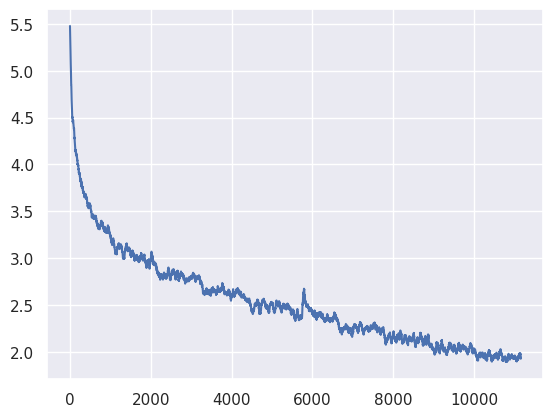

In [ ]:
# Graph the loss

window_size = 50
smoothed_losses = []
for i in range(len(losses)-window_size):
  smoothed_losses.append(np.mean(losses[i:i+window_size]))

plt.plot(smoothed_losses[100:])

In [ ]:
test_sentence = test_dataset[0]['translation']['en']
print('Raw input text:', test_sentence)

input_ids = encode_input_str(
    text = test_sentence,
    target_lang = 'ja',
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

print('Truncated input text:', tokenizer.convert_tokens_to_string(
    tokenizer.convert_ids_to_tokens(input_ids[0])))

Raw input text: It has been confirmed that eight thoroughbred race horses at Randwick Racecourse in Sydney have been infected with equine influenza.
Truncated input text: <jp> It has been confirmed that eight thoroughbred race horses at Randwick Racecourse</s>


In [ ]:
output_tokens = model.generate(input_ids, num_beams=10, num_return_sequences=3)
# print(output_tokens)
for token_set in output_tokens:
  print(tokenizer.decode(token_set, skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


ラッドウィック・レースコースで行われた8人のサーブ・ブルドッグレースの
ダートウィック・レースコースで行われた8人のサーブ・ブルドッグレースの
ラッドウィック競技場での8人のサーブ・ブルドッグレースの騎手


In [ ]:
#@title Slick Blue Translate
input_text = 'I love Egypt' #@param {type:"string"}
output_language = 'zh' #@param ["en", "ja", "zh"]

input_ids = encode_input_str(
    text = input_text,
    target_lang = output_language,
    tokenizer = tokenizer,
    seq_len = model.config.max_length,
    lang_token_map = LANG_TOKEN_MAPPING)
input_ids = input_ids.unsqueeze(0).cuda()

output_tokens = model.generate(input_ids, num_beams=20, length_penalty=0.2)
print(input_text + '  ->  ' + \
      tokenizer.decode(output_tokens[0], skip_special_tokens=True))

I love Egypt  ->  爱爱埃及,我喜欢埃及。
